<a href="https://colab.research.google.com/github/asim5800/Deep-learning-practicals/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Self Organizing Map***

#**Let's imagine we are deep learning scientists working for a bank and we are given a data set that contains information of customers from this bank applying for an advanced credit card. So basically, these informations are the data that customers had to provide when filling the application form.And our mission, is to detect potential fraud within these applications.**

***So that means that by the end of the mission,we have to give the explicit list,of the customers who potentially cheated.***

***What we're gonna do is unsupervised deep learning,which means that we will identify some patterns in a high dimensional data sets full of nonlinear relationships.And one of these patterns will be the potential fraud.***

The data  set is taken from theUCI Machine Learning Repository,it is called the Statlog Australian Credit Approval Data Set.


[DATASET LINK](http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval))





***All attribute names and values has been changed to meaningless symbols to protect confidentiality of the data. This problem even more complex and difficult to solve for human, indeed when we see the data set, we feel totally incapable of detecting any fraud.***

***So we clearly need a deep learning model to find the cheaters.***

##Install MiniSom Package

In [16]:
!pip install MiniSom

**MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display. Minisom is designed to allow researchers to easily build on top of it and to give students the ability to quickly grasp its details.**

### Importing the libraries


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [19]:
dataset = pd.read_csv('/content/drive/MyDrive/UNSUPERVISED DEEP LEARNING/Credit_Card_Applications.csv')


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [21]:
dataset.head(3)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


In [22]:
#SPLIT DATASET INTO TWO
X = dataset.iloc[:, :-1].values #taking all rows and all columns except the last one
y = dataset.iloc[:, -1].values # taking only last column

***Important point to make,we splited our data sets into x and y. But be careful we did not do that because we're doing some supervised learning, we're not trying to make a model that will predict zero or one in the end.***

***We're just doing this to make the distinction in the end between the customers who were approved and the customers who were not approved.***

## Feature Scaling


In [23]:
from sklearn.preprocessing import MinMaxScaler #as it is DL its better to normalise 0 to 1
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [24]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

##Training the SOM


In [25]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)   
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

***Inputs in MINISOM***

***Make 10X10 map (choose optimal according to data)***

***number of feature in dataset in 'X' only***

***sigma is the radius***

##Visualizing the results


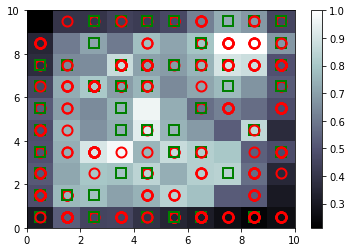

In [29]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) # put the different winning nodes on the map.


colorbar() #showing which MID corresponds to which color, smaller MID dark color, bigger MID  light color
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X): # i for customer numbers, x for each customer
    w = som.winner(x)    # get winning node of first customers
    plot(w[0] + 0.5,     # 100 winning node for 690 rows
         w[1] + 0.5,
         markers[y[i]],   
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

The red circles are going to correspond to the customers who didn't get approval.

And the green squares will correspond to the customers who got approval.

OBSERVE (2,9) white(light) color absolutely no doubt the Mean Interneuron Distance
is almost equal to one or perhaps equal to one.
Which clearly indicates that there is a high risk 
of fraud for these customers associated to these two winning nodes.

## Finding the frauds


In [31]:
#inverse mapping of winning nodes back to customers  mappings where white sqaure shows in this map 8,8; 9,9; 3,3
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(9,9)], mappings[(8,8)],  mappings[(3,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [35]:
#converting array back to dataframe
dataframe=pd.DataFrame(frauds) 

dataframe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15785339.0,1.0,35.25,3.165,2.0,14.0,8.0,3.750,1.0,0.0,0.0,1.0,2.0,680.0,1.0
1,15678210.0,1.0,42.17,5.040,2.0,11.0,8.0,12.750,1.0,0.0,0.0,1.0,2.0,92.0,1.0
2,15664615.0,1.0,33.17,1.040,2.0,12.0,8.0,6.500,1.0,0.0,0.0,1.0,2.0,164.0,31286.0
3,15716276.0,1.0,34.25,3.000,2.0,13.0,8.0,7.415,1.0,0.0,0.0,1.0,2.0,0.0,1.0
4,15803682.0,1.0,48.58,6.500,2.0,11.0,8.0,6.000,1.0,0.0,0.0,1.0,2.0,350.0,1.0
5,15762392.0,1.0,36.67,3.250,2.0,11.0,8.0,9.000,1.0,0.0,0.0,1.0,2.0,102.0,640.0
6,15699294.0,1.0,24.42,12.335,2.0,11.0,8.0,1.585,1.0,0.0,0.0,1.0,2.0,120.0,1.0
7,15697460.0,1.0,22.00,0.790,2.0,9.0,4.0,0.290,0.0,1.0,1.0,0.0,2.0,420.0,284.0
8,15683993.0,1.0,16.00,3.125,2.0,9.0,4.0,0.085,0.0,1.0,1.0,0.0,2.0,0.0,7.0
9,15632010.0,1.0,35.75,2.415,2.0,9.0,4.0,0.125,0.0,1.0,2.0,0.0,2.0,220.0,2.0


In [32]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15785339
15678210
15664615
15716276
15803682
15762392
15699294
15697460
15683993
15632010
15627365
15710138
